# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [17]:
import numpy as np
import pandas as pd

In [18]:
def montecarlo1(f, a, b, N):
    # Generar valores uniformemente distribuidos
    ui = (b - a) * np.random.rand(N) + a
    # Valor promedio
    VP = (1/N) * np.sum(f(ui))
    # Área aproximada
    AD_aprox = (b - a) * VP

    return AD_aprox

In [19]:
# Función
def funcion1(x):
    return np.exp(x) * np.log(x)

# Límites de integración
a = 1
b = 3

# Cantidad de términos
N = np.linspace(1, 5, 5).astype(int)

In [20]:
# Función
def funcion2(x):
    return np.sin(x) * np.log(x)

# Límites de integración
a = 1
b = 3

# Cantidad de términos
N = np.linspace(1, 5, 5).astype(int)

In [21]:
tabla = pd.DataFrame(index = N, columns = ['Aproximación función 1', 'Aproximación función 2'])
tabla.index.name = 'Cantidad de términos'

for n in N:
    tabla.loc[n, 'Aproximación función 1'] = montecarlo1(funcion1, a, b, n)
    tabla.loc[n, 'Aproximación función 2'] = montecarlo1(funcion2, a, b, n)
tabla

,Aproximación función 1,Aproximación función 2
Cantidad de términos,,
1,15.535396,1.279934
2,9.696312,0.341691
3,11.19698,1.071494
4,6.060021,1.002503
5,4.814408,0.768802


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

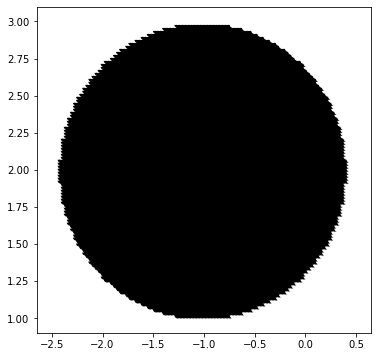

In [23]:
def region(x, y):
    return x**2 + 2*y**2 <= -2*x + 8*y - 7

P = 100

xnum = np.linspace(-2.5, 0.5, P)
ynum = np.linspace(1, 3, P)

X, Y = np.meshgrid(xnum, ynum)

plt.figure(figsize = (6,6))
plt.scatter(X, Y, 
            c = ~region(X, Y),
            cmap = 'bone')


$$A = ra * rb * \pi$$
<p>Donde:</p>
<p>$ra$ = radio del largo</p>
<p>$rb$ = radio del ancho</p>

In [24]:
# Calcular el área del Elipse
ra = 1
rb = 1.5
Ae = ra * rb * np.pi
Ae

4.71238898038469

In [25]:
def montecarlo(region, a1, b1, a2, b2, N):
    # Área del rectángulo
    AR = (b1 - a1)*(b2 - a2)
    # Generar los puntos (x,y) aleatorios
    x = np.random.uniform(a1, b1, N)
    y = np.random.uniform(a2, b2, N)
    
    bi = region(x, y)
    AD_aprox = AR * (1/N) * np.sum(bi)
    return AD_aprox

In [9]:
a1 = -2.5
b1 = 0.5
a2 = 1
b2 = 3

N = np.logspace(0, 5, 6).astype(int)

tabla = pd.DataFrame(index=N,
                     columns = ['Aproximación', 'Error relativo'])

tabla.index.name = 'Cantidad de términos'

for n in N:
    AD_aprox = montecarlo(region, a1, b1, a2, b2, n)
    tabla.loc[n, 'Aproximación'] = AD_aprox
    
tabla['Error relativo'] = np.abs(Ae - tabla['Aproximación'])
tabla

,Aproximación,Error relativo
Cantidad de términos,,
1,6.0,1.287611
10,5.4,0.687611
100,4.14,0.572389
1000,4.488,0.224389
10000,4.4292,0.283189
100000,4.43694,0.275449
